In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('performance.csv')
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [2]:
df.isnull().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

In [3]:
df = df.dropna()

In [4]:
X = df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade']]
y = df['FinalGrade']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 82.62973174376552
Coefficients: [-0.0404437   0.04914295 -0.00155775]


In [7]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison.head()

,Actual,Predicted
0,87.0,80.848158
1,68.0,80.540638
2,90.0,80.187165
3,90.0,79.551038
4,85.0,79.740463


In [8]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 93.48173280936638
R2 Score: -0.022404613536723295


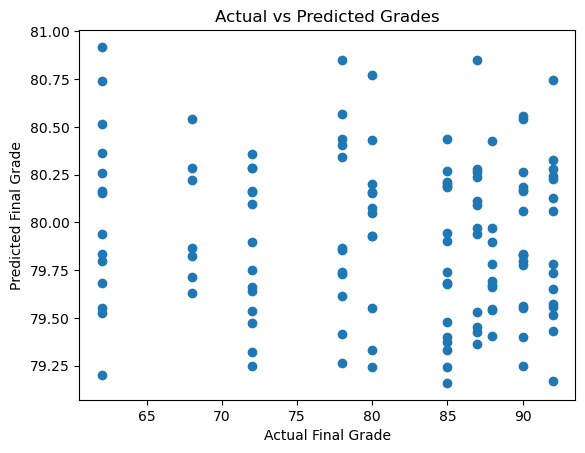

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Grades")
plt.show()

In [10]:
new_student = np.array([[85, 10, 75]])
predicted_grade = model.predict(new_student)

print("Predicted Final Grade:", predicted_grade[0])

Predicted Final Grade: 79.56661530706934


c:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
